# Simple linear regression - Exercise Solution

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [123]:
data = pd.read_csv('real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [124]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [125]:
x = data['size']
y = data['price']

### Explore the data

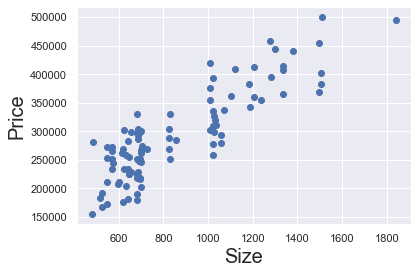

In [126]:
plt.scatter(x,y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

### Transform the inputs into a matrix (2D object)

In [127]:
x_matrix = x.values.reshape(-1,1)

### Regression itself

In [128]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate the R-squared

In [129]:
reg.score(x_matrix,y)

0.7447391865847587

### Find the intercept

In [130]:
reg.intercept_

101912.60180122915

### Find the coefficients

In [131]:
reg.coef_

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 & 1500 sq.ft.

All else equal what should be its price according to the model?

In [132]:
reg.predict( [[ 750 ]] )

array([269296.65874718])

In [133]:
reg.predict( [[ 1500 ]] )

array([436680.71569314])

In [134]:
new_data = pd.DataFrame(data = [750,1500],columns = ['Expected Size'])
new_data

,Expected Size
0,750
1,1500


In [135]:
reg.predict (new_data)

array([269296.65874718, 436680.71569314])

In [136]:
new_data['Prediction Prize'] = reg.predict (new_data)
new_data

,Expected Size,Prediction Prize
0,750,269296.658747
1,1500,436680.715693


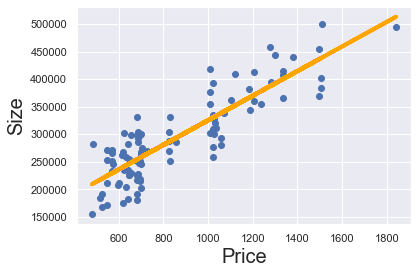

In [138]:
## lets plot it using matplotlib

plt.scatter(x,y)
yhat = reg.coef_*x_matrix+reg.intercept_
# yhat = a+ bx
fig = plt.plot(x,yhat, lw = 4, c = 'orange', label = 'Regression Line')
plt.xlabel ('Price', fontsize = 20)
plt.ylabel('Size', fontsize = 20)
plt.show()

## R Square Using Sckit-learn

R Square

In [153]:
reg.score (x_matrix,y)

0.7447391865847587

## Adjusted R Square

Heres the formula

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [155]:
x_matrix.shape

(100, 1)

In [160]:
r2 = reg.score (x_matrix,y) 
n = x_matrix.shape[0]
p = x_matrix.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1) 
adjusted_r2

0.7421344844070521